In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import plotly
import plotly.graph_objects as go
import plotly.express as px

In [2]:
url= 'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv?raw=true'
df= pd.read_csv(url, error_bad_lines=False)
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [3]:
df['fuel_unit'].isnull().sum()
df['fuel_unit'].fillna(value='mcf', inplace=True)

In [46]:
df_coal= df[df['fuel_type_code_pudl']=='coal']
df_coal=df_coal.drop(columns=['record_id','utility_id_ferc1'])
df_coal.groupby(['report_year','plant_name_ferc1'])
df_coal.head()

,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
5,1994,e. c. gaston-unit 5,coal,ton,2124933.0,23.922,44.24,43.25,1.850


# TOTAL FUEL TYPE BURNED IN USA 1994-2018

In [142]:
df_fuel_types= df.groupby('fuel_type_code_pudl').sum()
df_fuel_types=df_fuel_types.reset_index()
df_fuel_types.drop(columns=['utility_id_ferc1','report_year'],inplace=True)
df_fuel_types=df_fuel_types.sort_values(by='fuel_qty_burned', ascending=False)
df_fuel_types

,fuel_type_code_pudl,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
1,gas,5.562880e+10,11737.687844,156891.829,1.389252e+05,62126.34574
0,coal,1.626898e+10,177459.483188,576254.381,9.995814e+05,15275.11517
2,nuclear,4.462058e+09,14382.174064,4053318.428,2.340864e+07,1404.14500
3,oil,5.089737e+08,46887.135739,1361824.819,2.531352e+06,102402.57762
4,other,4.923388e+08,95.649646,3048.394,2.817538e+03,25899.18000
5,waste,5.168139e+07,150.452780,8607.492,8.120156e+03,362815.08200


Text(0.5, 1.0, 'TOTAL FUEL TYPE BURNED IN USA 1994-2018')

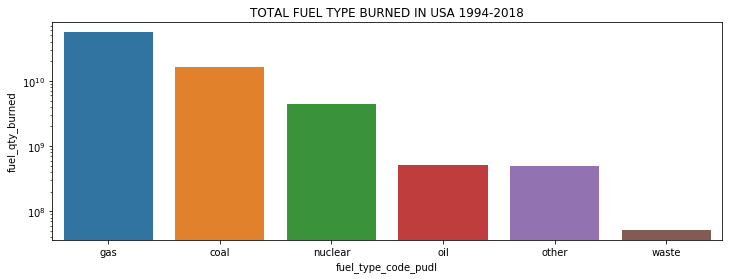

In [143]:
plt.figure(figsize=(12,4))
fuelType_burned_plot = sns.barplot(data=df_fuel_types, x='fuel_type_code_pudl', y='fuel_qty_burned')
fuelType_burned_plot.set_yscale("log")
plt.title("TOTAL FUEL TYPE BURNED IN USA 1994-2018")

<h2 style=color:red;>The total coal burned in Gorgas plant in the year 1994<h2/>

In [36]:
df_gogas_coal = df.loc[(df['fuel_type_code_pudl']=='coal') & (df['report_year']==1994),'report_year':'fuel_qty_burned']

In [40]:
gogas_coal= df_gogas_coal.loc[df['plant_name_ferc1']=="gorgas"]
gogas_coal
#plant_name_ferc1
#report_year

,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned
2,1994,gorgas,coal,ton,2978683.0


In [54]:
print(f"The total quantity of Coal the Gorgas plant  burned in 1994 is {gogas_coal.iloc[0,4]} tons")


The total quantity of Coal the Gorgas plant  burned in 1994 is 2978683.0 tons


# An Insight into the fuel type burned in 1994
**steps**
* we slice the data frame by the fuel type and report year
* we rename the column for easy understanding
* we group the sliced dataframe by fuel type and get the sum for each
* then we visualize the corresponding results

In [61]:
fuel_1994 = df.loc[df['report_year']==1994, 'fuel_type_code_pudl':'fuel_cost_per_mmbtu']
fuel_1994.rename(columns={'fuel_type_code_pudl':'fuel_type','fuel_cost_per_mmbtu':'Energy_cost_per_unit',
                          'fuel_mmbtu_per_unit':'Energy_per_unit'},inplace=True)
fuel_1994.head()

,fuel_type,fuel_unit,fuel_qty_burned,Energy_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,Energy_cost_per_unit
0,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [66]:
fuel_1994=fuel_1994.groupby('fuel_type').sum().reset_index()
fuel_1994

,fuel_type,fuel_qty_burned,Energy_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,Energy_cost_per_unit
0,coal,7.172082e+08,10293.429297,14984.572,59215.371,682.14697
1,gas,2.432212e+09,498.035534,10792.496,8099.070,1368.51941
2,nuclear,2.069366e+08,1384.184311,227983.354,3483.492,136.53400
3,oil,1.469716e+06,960.537684,9362.194,7622.838,1147.21573
4,other,5.094458e+06,1.287506,116.737,117.148,27.97400
5,waste,1.242241e+06,0.577288,52.762,52.615,450.02700


Text(0.5, 1.0, 'TOTAL FUEL_QUANTIY BY FUEL TYPE BURNED IN THE USA IN 1994')

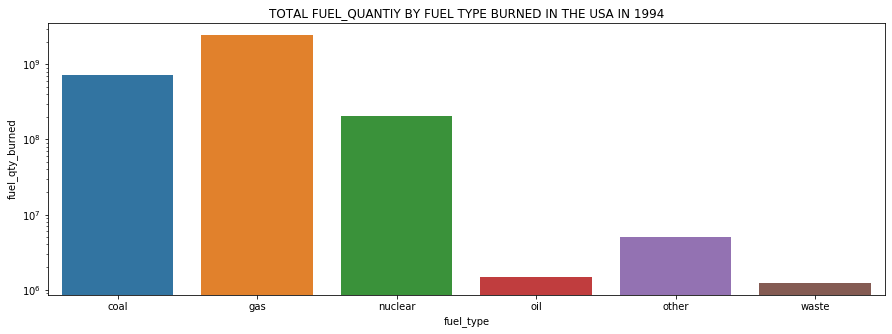

In [80]:
plt.figure(figsize=(15,5))
coal_burned_plot = sns.barplot(data=fuel_1994, x='fuel_type', y='fuel_qty_burned')
coal_burned_plot.set_yscale("log")
plt.title("TOTAL FUEL_QUANTIY BY FUEL TYPE BURNED IN THE USA IN 1994")

# in several years

In [90]:
fuel_1994 = df.loc[df['report_year']==1994, 'fuel_type_code_pudl':'fuel_cost_per_mmbtu']
fuel_1994.rename(columns={'fuel_type_code_pudl':'fuel_type','fuel_cost_per_mmbtu':'Energy_cost_per_unit',
                          'fuel_mmbtu_per_unit':'Energy_per_unit'},inplace=True)

fuel_1994=fuel_1994.groupby('fuel_type').sum().reset_index()



#analysis for 1999
fuel_1999 = df.loc[df['report_year']==1999, 'fuel_type_code_pudl':'fuel_cost_per_mmbtu']
fuel_1999.rename(columns={'fuel_type_code_pudl':'fuel_type','fuel_cost_per_mmbtu':'Energy_cost_per_unit',
                          'fuel_mmbtu_per_unit':'Energy_per_unit'},inplace=True)

fuel_1999=fuel_1999.groupby('fuel_type').sum().reset_index()



#analysis for 2004
fuel_2004 = df.loc[df['report_year']==2004, 'fuel_type_code_pudl':'fuel_cost_per_mmbtu']
fuel_2004.rename(columns={'fuel_type_code_pudl':'fuel_type','fuel_cost_per_mmbtu':'Energy_cost_per_unit',
                          'fuel_mmbtu_per_unit':'Energy_per_unit'},inplace=True)

fuel_2004=fuel_2004.groupby('fuel_type').sum().reset_index()



#Analysis foor 2009
fuel_2009 = df.loc[df['report_year']==2009, 'fuel_type_code_pudl':'fuel_cost_per_mmbtu']
fuel_2009.rename(columns={'fuel_type_code_pudl':'fuel_type','fuel_cost_per_mmbtu':'Energy_cost_per_unit',
                          'fuel_mmbtu_per_unit':'Energy_per_unit'},inplace=True)

fuel_2009=fuel_2009.groupby('fuel_type').sum().reset_index()


#analysis for 2014
fuel_2014 = df.loc[df['report_year']==2014, 'fuel_type_code_pudl':'fuel_cost_per_mmbtu']
fuel_2014.rename(columns={'fuel_type_code_pudl':'fuel_type','fuel_cost_per_mmbtu':'Energy_cost_per_unit',
                          'fuel_mmbtu_per_unit':'Energy_per_unit'},inplace=True)

fuel_2014=fuel_2014.groupby('fuel_type').sum().reset_index()


#Analysis for 2018
fuel_2018 = df.loc[df['report_year']==2018, 'fuel_type_code_pudl':'fuel_cost_per_mmbtu']
fuel_2018.rename(columns={'fuel_type_code_pudl':'fuel_type','fuel_cost_per_mmbtu':'Energy_cost_per_unit',
                          'fuel_mmbtu_per_unit':'Energy_per_unit'},inplace=True)

fuel_2018=fuel_2018.groupby('fuel_type').sum().reset_index()

Text(0.5, 1.0, 'TOTAL FUEL_QUANTIY BY FUEL TYPE BURNED IN THE USA IN 2018')

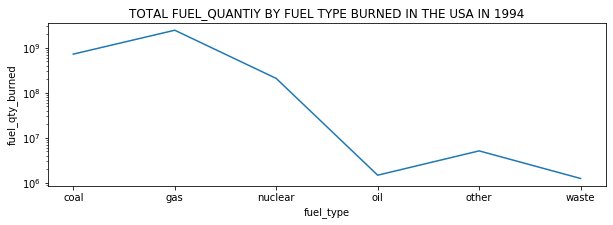

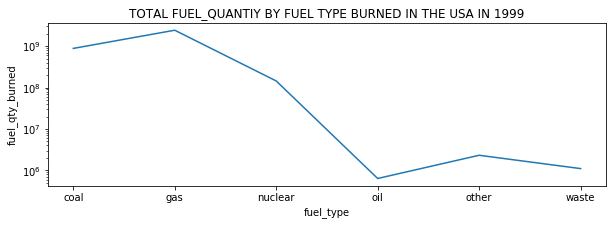

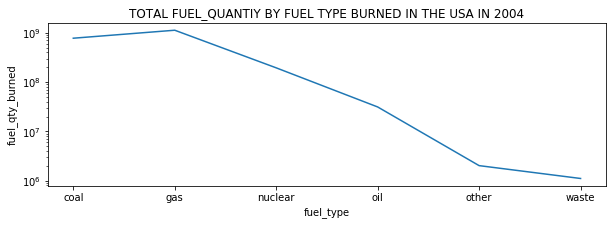

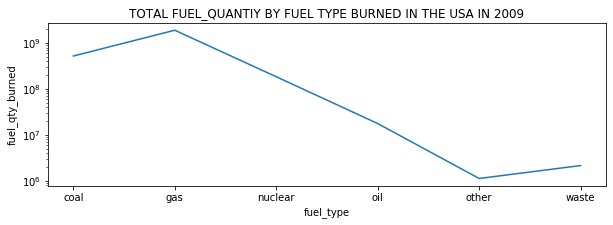

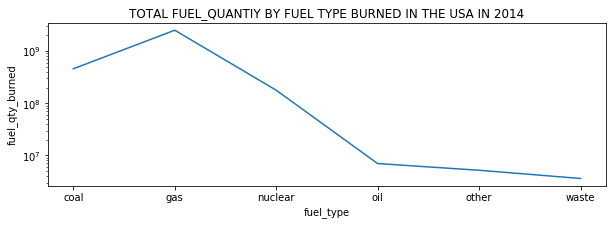

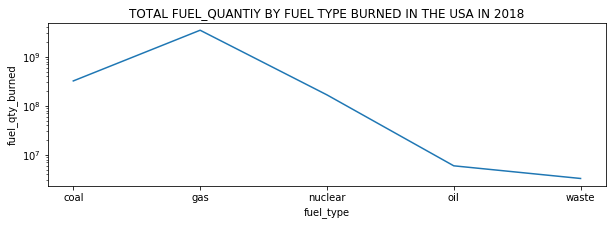

In [146]:
plt.figure(figsize=(10,3))
fuel_burned_plot = sns.lineplot(data=fuel_1994, x='fuel_type', y='fuel_qty_burned')
fuel_burned_plot.set_yscale("log")
plt.title("TOTAL FUEL_QUANTIY BY FUEL TYPE BURNED IN THE USA IN 1994")


plt.figure(figsize=(10,3))
fuel_burned_plot = sns.lineplot(data=fuel_1999, x='fuel_type', y='fuel_qty_burned')
fuel_burned_plot.set_yscale("log")
plt.title("TOTAL FUEL_QUANTIY BY FUEL TYPE BURNED IN THE USA IN 1999")



plt.figure(figsize=(10,3))
fuel_burned_plot = sns.lineplot(data=fuel_2004, x='fuel_type', y='fuel_qty_burned')
fuel_burned_plot.set_yscale("log")
plt.title("TOTAL FUEL_QUANTIY BY FUEL TYPE BURNED IN THE USA IN 2004")



plt.figure(figsize=(10,3))
fuel_burned_plot = sns.lineplot(data=fuel_2009, x='fuel_type', y='fuel_qty_burned')
fuel_burned_plot.set_yscale("log")
plt.title("TOTAL FUEL_QUANTIY BY FUEL TYPE BURNED IN THE USA IN 2009")



plt.figure(figsize=(10,3))
fuel_burned_plot = sns.lineplot(data=fuel_2014, x='fuel_type', y='fuel_qty_burned')
fuel_burned_plot.set_yscale("log")
plt.title("TOTAL FUEL_QUANTIY BY FUEL TYPE BURNED IN THE USA IN 2014")




plt.figure(figsize=(10,3))
fuel_burned_plot = sns.lineplot(data=fuel_2018, x='fuel_type', y='fuel_qty_burned')
fuel_burned_plot.set_yscale("log")
plt.title("TOTAL FUEL_QUANTIY BY FUEL TYPE BURNED IN THE USA IN 2018")

# individual plants in respect to each fuel type burned

In [144]:
fuel_1994

,fuel_type,fuel_qty_burned,Energy_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,Energy_cost_per_unit
0,coal,7.172082e+08,10293.429297,14984.572,59215.371,682.14697
1,gas,2.432212e+09,498.035534,10792.496,8099.070,1368.51941
2,nuclear,2.069366e+08,1384.184311,227983.354,3483.492,136.53400
3,oil,1.469716e+06,960.537684,9362.194,7622.838,1147.21573
4,other,5.094458e+06,1.287506,116.737,117.148,27.97400
5,waste,1.242241e+06,0.577288,52.762,52.615,450.02700


###  COAL CONSUMED IN RESPECT TO EACH PLANTS

In [132]:
fuel_by_plants=df.loc[df['fuel_type_code_pudl']=='coal','plant_name_ferc1':'fuel_cost_per_mmbtu']

fuel_by_plants.rename(columns={'fuel_type_code_pudl':'fuel_type','fuel_cost_per_mmbtu':'Energy_cost_per_unit',
                          'fuel_mmbtu_per_unit':'Energy_per_unit'},inplace=True)

fuel_by_plants=fuel_by_plants.groupby('plant_name_ferc1').sum()

fuel_by_plants=fuel_by_plants.sort_values(by='fuel_qty_burned',ascending=False).reset_index()

print(f"returned values for {fuel_by_plants.shape[0]} plants")

fuel_by_plants.head(10)


returned values for 929 plants


,plant_name_ferc1,fuel_qty_burned,Energy_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,Energy_cost_per_unit
0,j. m. stuart - tota,555894250.0,23.112000,33.990,33.390,1.47300
1,rockport total plant,431924313.0,828.472000,1499.960,1497.947,85.27700
2,white bluff,422137697.0,380.048392,565.751,29.904,41.44500
3,independence,358371215.0,922.641606,1304.419,254.730,95.26200
4,scherer,294884812.0,909.408000,970.020,979.015,93.92300
5,ghent,251326937.0,585.446000,1012.791,1039.763,43.67300
6,navajo,230921139.0,996.088298,1672.390,1429.201,77.51900
7,labadie,227341804.0,443.790000,596.887,598.049,33.71289
8,bowen,223550112.0,488.396000,1250.409,1250.409,51.42200
9,amos-total,219194000.0,848.886000,1605.819,1610.492,66.18200


###  GAS CONSUMED IN RESPECT TO EACH PLANTS

In [133]:
fuel_by_plants2=df.loc[df['fuel_type_code_pudl']=='gas','plant_name_ferc1':'fuel_cost_per_mmbtu']

fuel_by_plants2.rename(columns={'fuel_type_code_pudl':'fuel_type','fuel_cost_per_mmbtu':'Energy_cost_per_unit',
                          'fuel_mmbtu_per_unit':'Energy_per_unit'},inplace=True)

fuel_by_plants2=fuel_by_plants2.groupby('plant_name_ferc1').sum()

fuel_by_plants2=fuel_by_plants2.sort_values(by='fuel_qty_burned',ascending=False).reset_index()

print(f"returned values for {fuel_by_plants2.shape[0]} plants")

fuel_by_plants2.head(10)


returned values for 1331 plants


,plant_name_ferc1,fuel_qty_burned,Energy_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,Energy_cost_per_unit
0,sabine,1.527381e+09,24.776937,102.298,0.000,99.07600
1,sanford,1.293243e+09,32.580842,189.918,189.918,189.91800
2,ninemile point,1.289418e+09,25.635513,113.941,7.294,111.03000
3,hines energy complex,1.133614e+09,19.477501,120.101,120.101,117.61900
4,west county,1.120884e+09,9.123651,51.430,51.430,51.43000
5,martin,1.120826e+09,40.491375,197.751,198.388,197.75100
6,lauderdale,1.043543e+09,49.775544,3592.006,3592.006,300.00256
7,ft. myers,1.036837e+09,31.680084,218.670,218.670,218.67000
8,manatee,8.013734e+08,29.623035,193.954,193.954,193.95400
9,mcdonough no. 4-6,7.851487e+08,7.191000,27.973,27.973,27.31400


###  NUCLEAR CONSUMED IN RESPECT TO EACH PLANTS

In [134]:
fuel_by_plants3=df.loc[df['fuel_type_code_pudl']=='nuclear','plant_name_ferc1':'fuel_cost_per_mmbtu']

fuel_by_plants3.rename(columns={'fuel_type_code_pudl':'fuel_type','fuel_cost_per_mmbtu':'Energy_cost_per_unit',
                          'fuel_mmbtu_per_unit':'Energy_per_unit'},inplace=True)

fuel_by_plants3=fuel_by_plants3.groupby('plant_name_ferc1').sum()

fuel_by_plants3=fuel_by_plants3.sort_values(by='fuel_qty_burned',ascending=False).reset_index()

print(f"returned values for {fuel_by_plants3.shape[0]} plants")

fuel_by_plants3.head(10)



returned values for 126 plants


,plant_name_ferc1,fuel_qty_burned,Energy_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,Energy_cost_per_unit
0,arkansas nuclear one,893544274.0,71.670835,45.456,0.000,13.319
1,waterford 3,692569976.0,89.029376,370.629,0.000,106.596
2,grand gulf unit 1,516898961.0,64.839400,35.404,0.000,10.375
3,river bend,507389424.0,416.337200,49.124,0.000,14.394
4,wolf creek,407737393.0,0.000009,3.809,3.809,3.809
5,wolf creek (47%),370031698.0,0.000009,6.066,6.066,136.209
6,ar nuclear one,120736712.0,10.237800,5.226,0.000,1.532
7,grand gulf,118215259.0,17.063000,14.106,0.000,4.134
8,beaver valley #1,107750823.0,125.229776,2.505,0.000,2.505
9,* ar nuclear one,43877929.0,3.412600,1.679,0.000,0.492


###  OIL CONSUMED IN RESPECT TO EACH PLANTS

In [136]:
fuel_by_plants4=df.loc[df['fuel_type_code_pudl']=='oil','plant_name_ferc1':'fuel_cost_per_mmbtu']

fuel_by_plants4.rename(columns={'fuel_type_code_pudl':'fuel_type','fuel_cost_per_mmbtu':'Energy_cost_per_unit',
                          'fuel_mmbtu_per_unit':'Energy_per_unit'},inplace=True)

fuel_by_plants4=fuel_by_plants4.groupby('plant_name_ferc1').sum()

fuel_by_plants4=fuel_by_plants4.sort_values(by='fuel_qty_burned',ascending=False).reset_index()

print(f"returned values for {fuel_by_plants4.shape[0]} plants")

fuel_by_plants4.head(10)



returned values for 1084 plants


,plant_name_ferc1,fuel_qty_burned,Energy_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,Energy_cost_per_unit
0,total,62457480.0,50.452374,429.110,0.000,68.050
1,jeffrey (jec),47277751.0,109.739758,1460.940,1495.674,251.832
2,kahe,32378136.0,37.886646,363.218,0.000,57.565
3,manatee,24384316.0,89.023914,1110.006,1110.006,174.620
4,anclote,21471521.0,51.867561,475.820,351.426,73.825
5,martin,21189598.0,112.139034,1326.543,1326.543,211.280
6,waiau,17899671.0,108.130848,1552.897,0.000,176.179
7,port everglades,17166257.0,167.396670,2033.916,2033.916,353.004
8,maalaea,13734515.0,58.600080,664.400,668.820,113.380
9,greene county,13273084.0,35.286720,50.088,0.000,48.410


###  OTHER FUEL TYPE  CONSUMED IN RESPECT TO EACH PLANTS

In [137]:
fuel_by_plants6=df.loc[df['fuel_type_code_pudl']=='other','plant_name_ferc1':'fuel_cost_per_mmbtu']

fuel_by_plants6.rename(columns={'fuel_type_code_pudl':'fuel_type','fuel_cost_per_mmbtu':'Energy_cost_per_unit',
                          'fuel_mmbtu_per_unit':'Energy_per_unit'},inplace=True)

fuel_by_plants6=fuel_by_plants6.groupby('plant_name_ferc1').sum()

fuel_by_plants6=fuel_by_plants6.sort_values(by='fuel_qty_burned',ascending=False).reset_index()

print(f"returned values for {fuel_by_plants6.shape[0]} plants")

fuel_by_plants6.head(10)



returned values for 44 plants


,plant_name_ferc1,fuel_qty_burned,Energy_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,Energy_cost_per_unit
0,perry k & w,419952625.0,0.200000,0.089,0.000,0.887
1,cloquet,29568490.0,0.011344,4.738,4.738,3.344
2,celanese ii,13005112.0,0.017800,34.835,34.835,25305.471
3,perry k,5748477.0,0.100000,0.040,0.000,0.400
4,hibbard,4306427.0,0.008100,26.814,26.814,12.038
5,w.f. wyman unit 4,3829476.0,1.355774,154.327,155.001,24.320
6,watson continued,2865295.0,3.085430,4.707,4.320,8.765
7,greene county ct,2677674.0,0.001024,2.440,0.000,2.370
8,wyman #4 (5) (8),1861583.0,0.302133,38.037,38.538,5.995
9,wyman #4 2.6284%,1754038.0,0.151400,14.769,13.998,2.323


###  WASTE FUEL TYPE IN RESPECT TO EACH PLANTS

In [138]:
fuel_by_plants7=df.loc[df['fuel_type_code_pudl']=='waste','plant_name_ferc1':'fuel_cost_per_mmbtu']

fuel_by_plants7.rename(columns={'fuel_type_code_pudl':'fuel_type','fuel_cost_per_mmbtu':'Energy_cost_per_unit',
                          'fuel_mmbtu_per_unit':'Energy_per_unit'},inplace=True)

fuel_by_plants7=fuel_by_plants7.groupby('plant_name_ferc1').sum()

fuel_by_plants7=fuel_by_plants7.sort_values(by='fuel_qty_burned',ascending=False).reset_index()

print(f"returned values for {fuel_by_plants7.shape[0]} plants")

fuel_by_plants7.head(10)



returned values for 64 plants


,plant_name_ferc1,fuel_qty_burned,Energy_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,Energy_cost_per_unit
0,kettle falls,11622701.0,145.428800,387.163,385.463,46.624
1,pittsylvania,7590824.0,0.069120,336.830,299.860,34.700
2,schiller,5635206.0,0.058358,431.696,368.233,44.446
3,bay front,5355038.0,0.353183,490.136,460.932,43.748
4,wilmarth,4405500.0,0.143844,278.972,82.421,24.233
5,southampton,2477578.0,0.028655,162.070,179.500,17.250
6,polyester,2471970.0,0.028983,169.430,177.840,17.570
7,altavista,2355543.0,0.069413,262.160,263.880,23.280
8,french island,1713614.0,0.175600,-283.547,-343.146,-62.480
9,rothschild,1275663.0,0.000036,113.188,113.188,360294.601
